In [1]:
import pandas as pd

# Read csv file

In [2]:
df = pd.read_csv("bi.csv",  encoding_errors="ignore")

In [3]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,UK,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


# Data cleaning

### Check dataset structure

In [4]:
df.shape

(77, 11)

### Checking data types and null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


- Data types are all good
- 2 null cells in python column

### Data consistency

#### Checking gender

In [6]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [7]:
df['gender'] = df['gender'].str.strip().str.upper()
df['gender'] = df['gender'].replace({
    'M': 'Male',
    "MALE": 'Male',
    'F': 'Female',
    'FEMALE':'Female'
})

In [8]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

#### Checking country

In [9]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [10]:
df['country'].value_counts()

country
Norway          47
Uganda           4
Kenya            3
Germany          3
Italy            2
Spain            2
Netherlands      2
Denmark          2
UK               2
Somali           2
Nigeria          2
France           2
norway           1
Norge            1
South Africa     1
Rsa              1
Name: count, dtype: int64

In [11]:
# Fixing norway, and south africa
df['country'] = df['country'].str.strip().str.upper().replace({
    'NORWAY': 'Norway',
    'NORGE': 'Norway',
    'RSA': 'SOUTH AFRICA'
}) 

In [12]:
df['country'].unique()

array(['Norway', 'KENYA', 'UGANDA', 'SOUTH AFRICA', 'DENMARK',
       'NETHERLANDS', 'ITALY', 'SPAIN', 'UK', 'SOMALI', 'NIGERIA',
       'GERMANY', 'FRANCE'], dtype=object)

#### Ckeking prevEducation

In [13]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [14]:
df['prevEducation'] = df['prevEducation'].str.strip().str.lower()

df['prevEducation'] = df['prevEducation'].replace({
    'bachelors': 'Bachelors',
    'barrrchelors' : 'Bachelors', 
    "diploma": 'Diploma',
    'diplomaaa': 'Diploma',
    'highschool': 'High School',
    'high school': 'High School',
    'masters': 'Masters',
    'doctorate': "Doctorate"
})

In [15]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

### Checking for duplicates

In [16]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
72    False
73    False
74    False
75    False
76    False
Length: 77, dtype: bool

In [17]:
df.duplicated().sum()

np.int64(0)

#### No duplicated rows

In [18]:
# Just to make sure
df.drop_duplicates(inplace=True)

# Missing data

In [19]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [20]:
# since python is a numeric column so we can use mean or median
df["Python"] = df["Python"].fillna(df["Python"].median())

In [21]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

# Outliers

### Identifying outliers

In [22]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.987013,69.467532
std,10.341966,16.475784,12.743272,15.228517,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


#### Python, DB, and entryExam are correct: between 0 - 100

#### Checking studyHOURS oultiers

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='studyHOURS'>

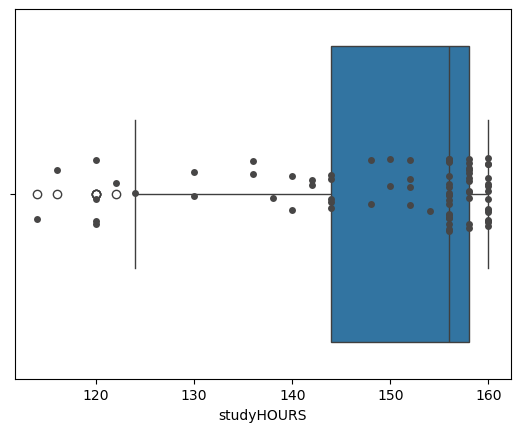

In [24]:
sns.boxplot(x='studyHOURS', data=df)
sns.stripplot(x='studyHOURS', data=df, color="#474646")


#### Fixing the outlier

In [25]:
# pip install datasist

In [26]:
from datasist.structdata import detect_outliers

# replacing the outliers of each column with the median of that column
outlier_ind = detect_outliers(df, 0, ['studyHOURS'])
median = df['studyHOURS'].median()              
df.loc[outlier_ind, 'studyHOURS'] = median

print(len(outlier_ind))

# df.drop(outlier_ind, inplace = True)   # If we wanted to drop these rows

7


In [27]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,153.090909,75.987013,69.467532
std,10.341966,16.475784,8.134044,15.228517,17.033701
min,21.000000,28.000000,124.000000,15.000000,30.000000
25%,27.000000,69.000000,152.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


# Saving the cleaned data in anew csv file

In [28]:
df.to_csv('cleaned_students.csv', index=False, encoding='utf-8')
